# 数据集

本节将介绍如何访问本书必要的数据集。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

## Iris 数据集（R.Fisher / Scikit-Learn）

其中最多使用的机器学习数据集是 iris flower 数据集，我们使用 scikit-learn 的数据集中引入，在这里了解更多：http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
print(len(iris.data))
print(len(iris.target))
print(iris.data[0])
print(set(iris.target))

150
150
[ 5.1  3.5  1.4  0.2]
{0, 1, 2}


## 低出生体重数据集（Github）

“低出生体重数据集”出自一个著名的由 Hosmer 和 Lemeshow 在 1989 年研究，被叫做“Low Infant Birth Weight Risk Factor Study”，被广泛用于大学院校研究线性回归的数据集，我们把这个数据集放在了 github 上：https://github.com/nfmcclure/tensorflow_cookbook/raw/master/01_Introduction/07_Working_with_Data_Sources/birthweight_data/birthweight.dat

In [3]:
import requests

birthdata_url = 'https://github.com/nfmcclure/tensorflow_cookbook/raw/master/01_Introduction/07_Working_with_Data_Sources/birthweight_data/birthweight.dat'
birth_file = requests.get(birthdata_url)
birth_data = birth_file.text.split('\r\n')
birth_header = birth_data[0].split('\t')
birth_data = [[float(x) for x in y.split('\t') if len(x) >= 1] for y in birth_data[1:] if len(y) >= 1]
print(len(birth_data))
print(len(birth_data[0]))

189
9


## 房价数据集（UCI）

房价数据集来自加利福尼亚大学的机器学习数据集仓库。这是一个非常棒的回归数据集。这里有更多介绍：https://archive.ics.uci.edu/ml/datasets/Housing

In [4]:
import requests

housing_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
housing_header = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_file = requests.get(housing_url)
housing_data = [[float(x) for x in y.split(' ') if len(x)>=1] for y in housing_file.text.split('\n') if len(y)>=1]
print(len(housing_data))
print(len(housing_data[0]))

506
14


## MNIST 手写数据集（Yann Lecun）

MNIST 手写数字数据集是图像识别的 hello world 的数据集，由著名的科学家和研究者，Yann Lecun 提供，数据集在这里：http://yann.lecun.com/exdb/mnist/ 因为它是如此被广泛的使用，好多机器学习的库（包括 tf）都将它集成在了里面，在 tf 里我们可以如下使用它：

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print(len(mnist.train.images))
print(len(mnist.test.images))
print(len(mnist.validation.images))
print(mnist.train.labels[1, :])

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
55000
10000
5000
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


## CIFAR-10 数据

CIFAR-10 数据（https://www.cs.toronto.edu/~kriz/cifar.html ）包括 60,000 张 10 个分类的 32x32 的彩色图像，它由 Alex Krizhevsky，Vinod Nair 和 Geoffrey Hinton 收集提供。Alex 维护上面的网站。这也是一个通用的数据集，可通过 tf 内置函数访问它的数据（keras wrapper 有相关命令）。注意 keras wrapper 自动把它分解为 50,000 训练数据集和 10,000 测试数据集。

In [6]:
from PIL import Image

# 运行这个命令将通过网络下载所有的图片，可能会很耗时
(X_train, y_train), (X_test, y_test) = tf.contrib.keras.datasets.cifar10.load_data()

10 个分类为（按顺序）：

0. Airplane
1. Automobile
2. Bird
3. Car
4. Deer
5. Dog
6. Frog
7. Horses
8. Ship
9. Truck

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[0,] # 这是一只青蛙

array([6], dtype=uint8)

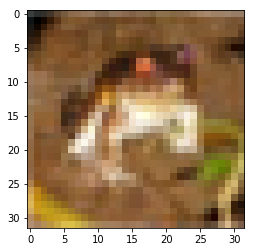

In [10]:
# 绘制这只青蛙
%matplotlib inline
img = Image.fromarray(X_train[0,:,:,:])
plt.imshow(img)

## 火腿/垃圾邮件文本数据集（UCI）
我们将使用另一个称为SMS垃圾邮件集合的UCI ML存储库数据集。 你可以在这里阅读：https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection。 作为关于常用术语的旁注，当预测数据点是否表示“垃圾邮件”（或不需要的广告）时，替代方案称为“火腿”（或有用信息）。
这是一个很好的数据集，用于从文本输入中预测二进制结果（垃圾邮件/火腿）。 这对于自然语言处理（Ch 7）和循环神经网络（Ch 9）的短文本序列将是非常有用的。

In [11]:
import requests
import io
from zipfile import ZipFile

# Get/read zip file
zip_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
r = requests.get(zip_url)
z = ZipFile(io.BytesIO(r.content))
file = z.read('SMSSpamCollection')
# Format Data
text_data = file.decode()
text_data = text_data.encode('ascii',errors='ignore')
text_data = text_data.decode().split('\n')
text_data = [x.split('\t') for x in text_data if len(x)>=1]
[text_data_target, text_data_train] = [list(x) for x in zip(*text_data)]
print(len(text_data_train))
print(set(text_data_target))
print(text_data_train[1])

5574
{'ham', 'spam'}
Ok lar... Joking wif u oni...


## 电影评论数据（Cornell）
Bo Pang和Lillian Lee（康奈尔大学研究人员）收集的电影评论数据库作为一个很好的数据集，用于从文本输入中预测数字。
您可以在这里阅读有关数据集和论文的更多信息：https：//www.cs.cornell.edu/people/pabo/movie-review-data/

In [12]:
import requests
import io
import tarfile

movie_data_url = 'http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz'
r = requests.get(movie_data_url)
# Stream data into temp object
stream_data = io.BytesIO(r.content)
tmp = io.BytesIO()
while True:
    s = stream_data.read(16384)
    if not s:  
        break
    tmp.write(s)
stream_data.close()
tmp.seek(0)
# Extract tar file
tar_file = tarfile.open(fileobj=tmp, mode="r:gz")
pos = tar_file.extractfile('rt-polaritydata/rt-polarity.pos')
neg = tar_file.extractfile('rt-polaritydata/rt-polarity.neg')
# Save pos/neg reviews
pos_data = []
for line in pos:
    pos_data.append(line.decode('ISO-8859-1').encode('ascii',errors='ignore').decode())
neg_data = []
for line in neg:
    neg_data.append(line.decode('ISO-8859-1').encode('ascii',errors='ignore').decode())
tar_file.close()

print(len(pos_data))
print(len(neg_data))
print(neg_data[0])

5331
5331
simplistic , silly and tedious . 



## 威廉·莎士比亚作品集（Gutenberg Project）

为了训练TensorFlow模型来创建文本，我们将对威廉莎士比亚的完整作品进行训练。 这可以通过古腾堡项目的良好工作来访问。 古腾堡项目通过让志愿者的辛勤工作免费获得许多非版权书籍。

您可以在这里阅读更多关于莎士比亚作品的信息：http://www.gutenberg.org/ebooks/100

In [13]:
# The Works of Shakespeare Data
import requests

shakespeare_url = 'http://www.gutenberg.org/cache/epub/100/pg100.txt'
# Get Shakespeare text
response = requests.get(shakespeare_url)
shakespeare_file = response.content
# Decode binary into string
shakespeare_text = shakespeare_file.decode('utf-8')
# Drop first few descriptive paragraphs.
shakespeare_text = shakespeare_text[7675:]
print(len(shakespeare_text))

5582212


## 英语 - 德语句子翻译数据库（Manythings / Tatoeba）

Tatoeba项目也由志愿者管理，旨在使许多不同语言之间提供最多双语的翻译。Manythings.org编译数据并使其可访问。

http://www.manythings.org/corpus/about.html#info

更多的双语句子对：http://www.manythings.org/bilingual/

In [14]:
# English-German Sentence Translation Data
import requests
import io
from zipfile import ZipFile
sentence_url = 'http://www.manythings.org/anki/deu-eng.zip'
r = requests.get(sentence_url)
z = ZipFile(io.BytesIO(r.content))
file = z.read('deu.txt')
# Format Data
eng_ger_data = file.decode()
eng_ger_data = eng_ger_data.encode('ascii',errors='ignore')
eng_ger_data = eng_ger_data.decode().split('\n')
eng_ger_data = [x.split('\t') for x in eng_ger_data if len(x)>=1]
[english_sentence, german_sentence] = [list(x) for x in zip(*eng_ger_data)]
print(len(english_sentence))
print(len(german_sentence))
print(eng_ger_data[10])

152557
152557
['Hello!', 'Hallo!']
